## K Mean Clustering Algo.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [3]:
#in clustering we cant take the Y value
x,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [5]:
x.shape

(1000, 2)

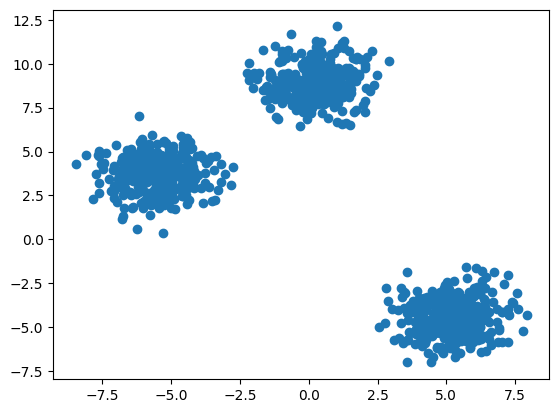

In [9]:
plt.scatter(x[:,0],x[:,1])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.30,random_state=42)

In [11]:
from sklearn.cluster import KMeans

### Manual(elbow method)

In [13]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[36285.58841267134,
 8328.553214543635,
 1377.5862843080135,
 1218.3298310405744,
 1079.7042776674862,
 937.9777404610347,
 796.700696533036,
 715.2954637623809,
 607.1282139313967,
 600.6879950344681]

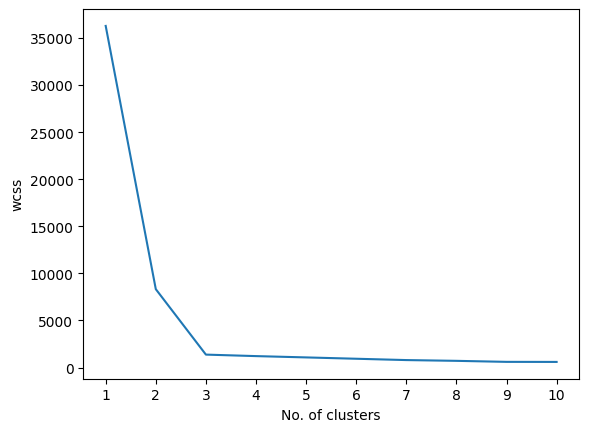

In [15]:
## elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [17]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_label=kmeans.fit_predict(x_train)

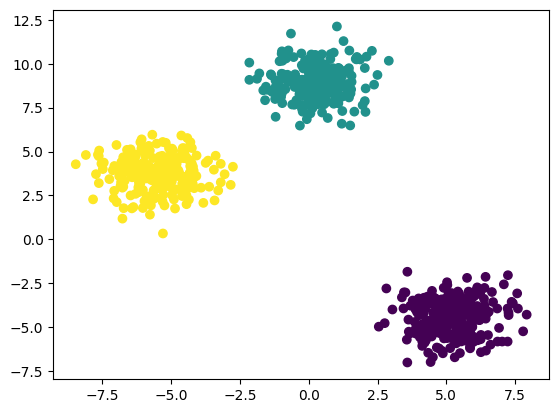

In [18]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_label)

In [24]:
from kneed import KneeLocator

In [25]:
#graph decrese ho raha hai to convex
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [26]:
#performance matrix
from sklearn.metrics import silhouette_score

In [38]:
silhouette_coefficients=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [39]:
silhouette_coefficients

[0.33721210446439315,
 0.33261045523384775,
 0.32255115963551984,
 0.3290757818356238,
 0.34032801808465296,
 0.3397028446467888,
 0.3335943536519025,
 0.31925088452129047,
 0.3147026989932568]

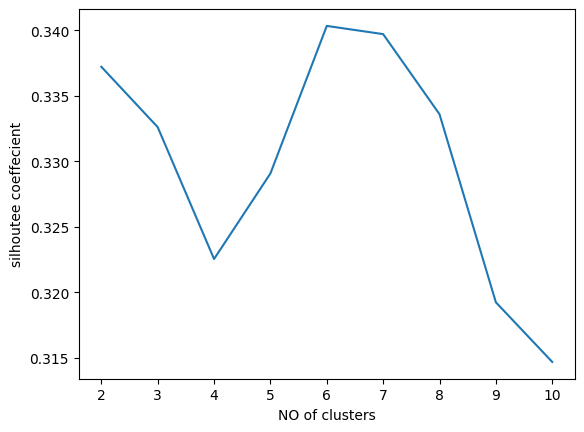

In [40]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('NO of clusters')
plt.ylabel('silhoutee coeffecient')
plt.show()

##Hirearichal Clustering

In [41]:
from sklearn import datasets
iris=datasets.load_iris()

In [42]:
iris_data=pd.DataFrame(iris.data)

In [43]:
iris_data.columns=iris.feature_names
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
##standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [45]:
x_scaled=scaler.fit_transform(iris_data)

In [47]:
x_scaled.shape

(150, 4)

In [48]:
##dimentionality reduction
##convert 4D  matrik to 2D matrix
from sklearn.decomposition import PCA

In [49]:
pca=PCA(n_components=2)

In [50]:
pca_scaled=pca.fit_transform(x_scaled)
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

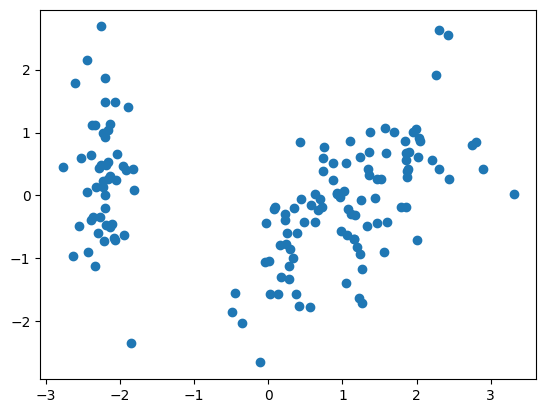

In [51]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

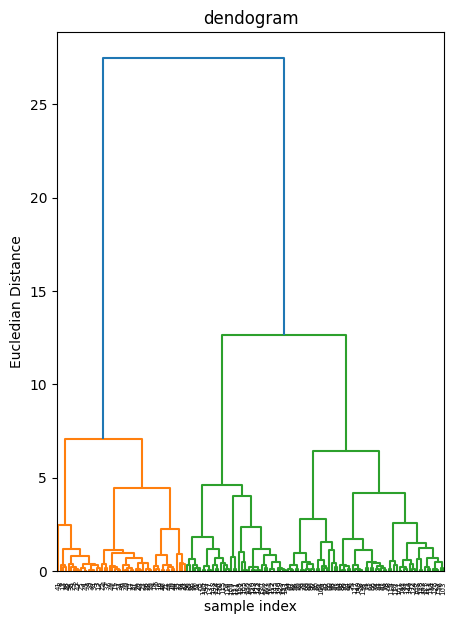

In [54]:
##Agglomerative Clustering
##To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(5,7))
plt.title('Dendogram')
##create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('dendogram')
plt.xlabel('sample index')
plt.ylabel('Eucledian Distance')

In [68]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,linkage='ward')
cluster.fit(pca_scaled)
AgglomerativeClustering()

AgglomerativeClustering()

In [69]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

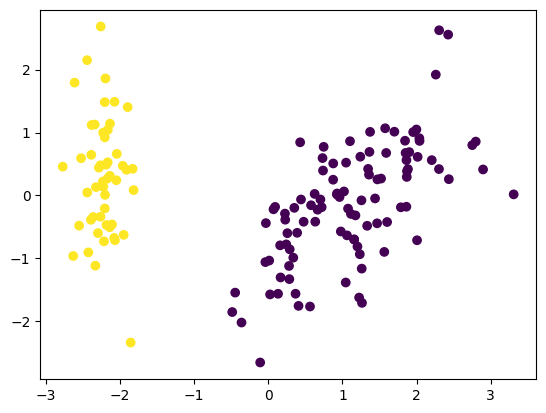

In [70]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [71]:
silhouette_coefficients=[]
for i in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,linkage='ward')
    agglo.fit(x_scaled)
    score=silhouette_score(x_scaled,agglo.labels_)
    silhouette_coefficients.append(score)

In [74]:
silhouette_coefficients

[0.3161120375980681,
 0.3161120375980681,
 0.3161120375980681,
 0.3161120375980681,
 0.3161120375980681,
 0.3161120375980681,
 0.3161120375980681,
 0.3161120375980681,
 0.3161120375980681]

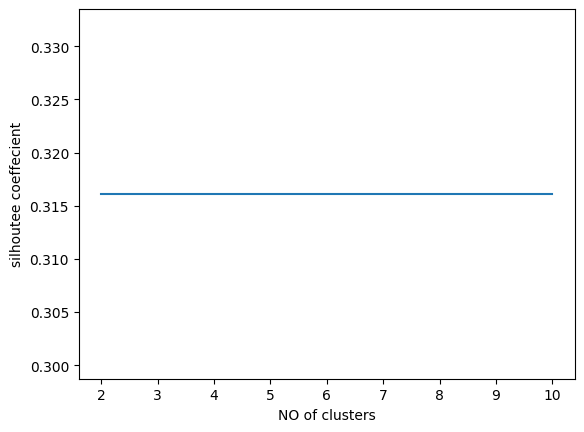

In [75]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('NO of clusters')
plt.ylabel('silhoutee coeffecient')
plt.show()

## DBSCAN clustering

In [78]:
# it clusters non linear data
from sklearn.datasets import make_moons
# it create 2 half moons

In [79]:
x,y=make_moons(n_samples=250,noise=0.05)

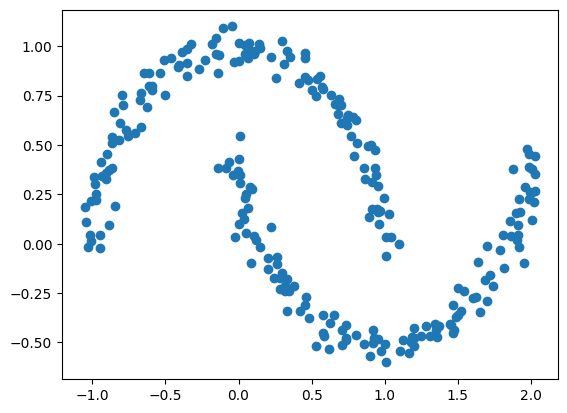

In [80]:
plt.scatter(x[:,0],x[:,1])

In [81]:
##feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [87]:
x_scaled=scaler.fit_transform(x)

In [88]:
from sklearn.cluster import DBSCAN

In [89]:
dbscan=DBSCAN(eps=0.5)

In [90]:
dbscan.fit(x_scaled)

DBSCAN()

In [91]:
dbscan.labels_

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

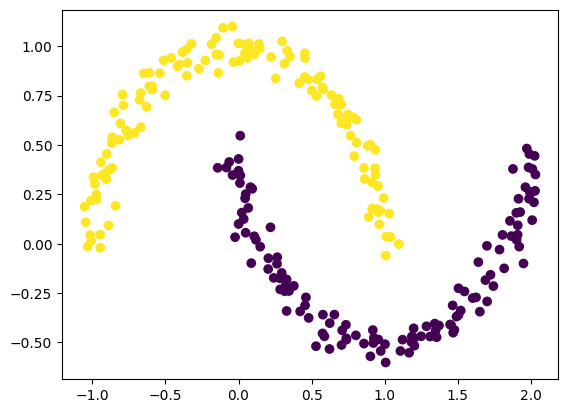

In [93]:
plt.scatter(x[:,0],x[:,1],c=dbscan.labels_)

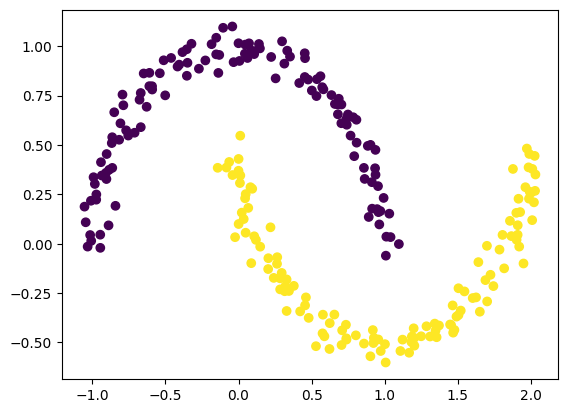

In [94]:
plt.scatter(x[:,0],x[:,1],c=y)